Text Analysis Project

Project to analyse amazon food reviews

Step 1: Setup and import libraries

In [2]:
#Setup and import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import nltk

from nltk.sentiment import SentimentIntensityAnalyzer

Read the reviews from the reviews dataset.

In [3]:
#Read the data in
df = pd.read_csv('Reviews.csv')

We can now check whether the data has been read in, and how it looks.

In [4]:
#Check read data
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


We still do not know how big the dataset is.

In [5]:
print(df.shape)

(568454, 10)


We could probably decrease our sample size to 50000 for now

In [6]:
df = df.head(50000)
print(df.shape)
df.head()

(50000, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


Explore the data to see how it looks like

In [7]:
df['Score']

0        5
1        1
2        4
3        2
4        5
        ..
49995    5
49996    5
49997    5
49998    4
49999    5
Name: Score, Length: 50000, dtype: int64

This is our what the score looks like which is a fundamental feature. Perhaps we could also check how many times each value appears on Score.

In [8]:
value_c = df['Score'].value_counts()
value_c

5    31130
4     7288
1     4721
3     4047
2     2814
Name: Score, dtype: int64

Most of the values listed are 5 stars. 

We can plot this on a bar graph to visualize how the data is broken down.

In [9]:
#Sort the scores
sorted_scores = value_c.sort_index()
sorted_scores

1     4721
2     2814
3     4047
4     7288
5    31130
Name: Score, dtype: int64

<Axes: title={'center': 'Value Count of Scores'}>

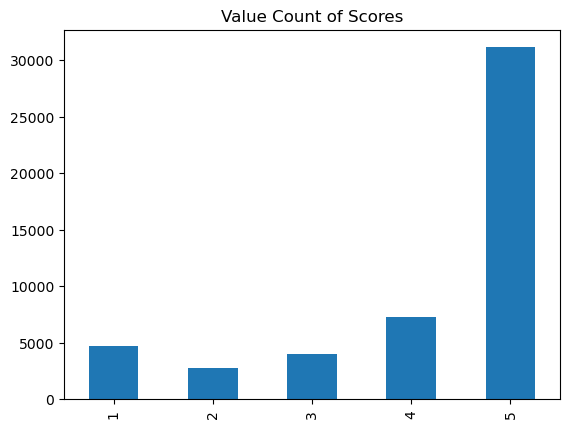

In [10]:
bar_graph = sorted_scores.plot(title = 'Value Count of Scores', kind='bar')
bar_graph

We can now start looking at the subject of what the reviewers are writing. Let's have a look at one of the texts.

In [11]:
text1 = df['Text'][9473]
print(text1)

This is the third Senseo brand coffe pod I have tried and it is my absolute favorite. I have tried Vanilla flavored coffees from several major gourmet coffee dealers and to me this coffee has the best Vanilla taste of them all. It is great to use in a single-serve type brew system or in a small 4-5 cup brewer [which is what I use]. The pod makes cleaning the brew basket a breeze and yet there is sufficient amount of grounds to give a good strength to the brew. I don't like my coffee as strong as some, so if I want more coffee I leave the pod in and simply run a quick second brew cycle. If you like your coffee "normal" strength you would likely use a new pod for each cup brewed. Also, this coffee is available in a "Subscribe and Ship Option", which is a wonderful way of assuring yourself of plenty of coffee at hand when you want it; just choose the frequency of shipment and leave it to Amazon!


This seems to be a very positive review. We can now try to extract the words and tokenize it using NLTK.

In [12]:
tokens = nltk.word_tokenize(text1)

Using these tokens we can now identify what part of speech they belong to using NLTK POS.
Let's have a look at how the tokens variable looks and then further into what it contains using POS.

In [13]:
tokens

['This',
 'is',
 'the',
 'third',
 'Senseo',
 'brand',
 'coffe',
 'pod',
 'I',
 'have',
 'tried',
 'and',
 'it',
 'is',
 'my',
 'absolute',
 'favorite',
 '.',
 'I',
 'have',
 'tried',
 'Vanilla',
 'flavored',
 'coffees',
 'from',
 'several',
 'major',
 'gourmet',
 'coffee',
 'dealers',
 'and',
 'to',
 'me',
 'this',
 'coffee',
 'has',
 'the',
 'best',
 'Vanilla',
 'taste',
 'of',
 'them',
 'all',
 '.',
 'It',
 'is',
 'great',
 'to',
 'use',
 'in',
 'a',
 'single-serve',
 'type',
 'brew',
 'system',
 'or',
 'in',
 'a',
 'small',
 '4-5',
 'cup',
 'brewer',
 '[',
 'which',
 'is',
 'what',
 'I',
 'use',
 ']',
 '.',
 'The',
 'pod',
 'makes',
 'cleaning',
 'the',
 'brew',
 'basket',
 'a',
 'breeze',
 'and',
 'yet',
 'there',
 'is',
 'sufficient',
 'amount',
 'of',
 'grounds',
 'to',
 'give',
 'a',
 'good',
 'strength',
 'to',
 'the',
 'brew',
 '.',
 'I',
 'do',
 "n't",
 'like',
 'my',
 'coffee',
 'as',
 'strong',
 'as',
 'some',
 ',',
 'so',
 'if',
 'I',
 'want',
 'more',
 'coffee',
 'I',
 '

Frequency Distribution
Here, we can check for frequency of our tokens.

In [14]:
from nltk.probability import FreqDist
freq_dist = FreqDist(tokens)
print(freq_dist)

<FreqDist with 115 samples and 194 outcomes>


This gives us an object that contains information of samples with total outcomes. Let's now see what the most common words are.



In [15]:
freq_dist.most_common(5)

[('a', 8), ('is', 7), ('coffee', 7), ('the', 6), ('I', 6)]

Let's plot and visualize the frequency distribution.



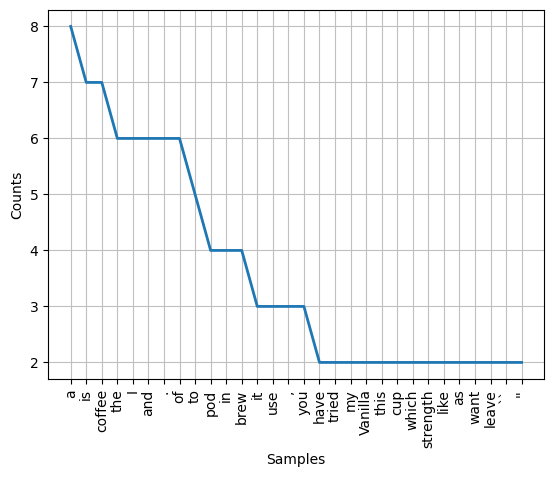

In [16]:
freq_dist.plot(30, cumulative = False)
plt.show()

The most common words seem to be very insignificant/neutral words that don't give us much information. Such as "a", "is", "the", or "I". 

Let's identify the stopwords from the text.

In [17]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
print(stop_words)

{'aren', 'yourself', 'again', 'i', 'few', 'wasn', 'over', 'where', 'ma', 'of', 'before', 'on', "aren't", 'shouldn', 'yourselves', 'ain', 'those', 'if', 'both', 'too', 'because', 'so', 'll', 'that', 'being', 'between', 'here', 'mightn', 'just', 'only', 'but', "needn't", 'hers', "won't", 'did', 'haven', 'during', 'itself', "shan't", 'any', "hadn't", 'doing', 'or', 'ourselves', "mustn't", 'weren', 'below', 'me', 'y', 'what', 'have', 'can', 'my', "you'll", 'why', 'an', 'were', 'in', 'these', 'while', "mightn't", 'such', 'own', 'has', 'had', 'wouldn', 'our', "should've", 'be', "doesn't", 'themselves', 'been', 'which', 'his', 'o', "that'll", 'you', 'each', 'some', 'how', 'after', 'he', 'couldn', 'needn', 'doesn', 'up', 'don', 'hasn', 'do', 'not', 'isn', 'does', 'into', 'himself', 'are', 'her', "don't", "it's", 'yours', 'is', 'its', 'under', "wouldn't", 'as', 's', 'more', 'other', 'than', "she's", 'further', "couldn't", 'they', 're', 'through', 'until', 'shan', 'off', "shouldn't", 'once', "is


Let's now remove stopwords from the data

In [19]:
filtered = []
for token in tokens:
    if token not in stop_words:
        filtered.append(token)
print("Tokens: ", tokens[:10])
print("Filtered: ", filtered[:10])

Tokens:  ['This', 'is', 'the', 'third', 'Senseo', 'brand', 'coffe', 'pod', 'I', 'have']
Filtered:  ['This', 'third', 'Senseo', 'brand', 'coffe', 'pod', 'I', 'tried', 'absolute', 'favorite']


We can see how much our data has been filtered in this process. Let's perform our frequency distribution again.

<FreqDist with 81 samples and 116 outcomes>


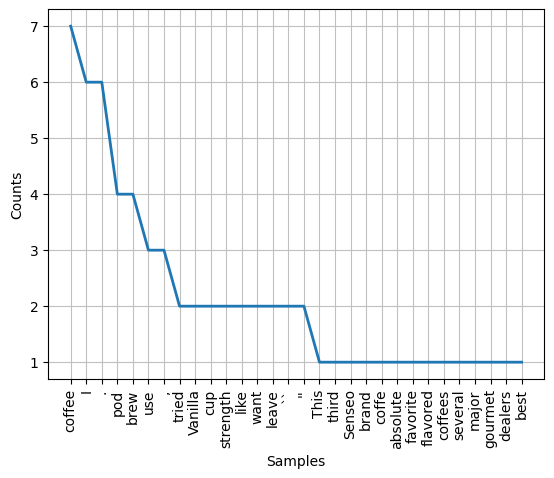

In [20]:
freq_dist = FreqDist(filtered)
print(freq_dist)

freq_dist.most_common(5)

freq_dist.plot(30, cumulative = False)
plt.show()



We now have a better frequency distribution that has removed some of the insignificant words from our text analysis.

Stemming

Now let's perform some Stemming here. This involves the chopping of words to their root word. This is done by chopping off their derivational affixes. 

In [24]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize




In [26]:
stemmer = PorterStemmer()
stems = []

for word in filtered:
    stems.append(stemmer.stem(word))

print("Filtered: ", filtered)
print("Stemmed: ", stems)

Filtered:  ['This', 'third', 'Senseo', 'brand', 'coffe', 'pod', 'I', 'tried', 'absolute', 'favorite', '.', 'I', 'tried', 'Vanilla', 'flavored', 'coffees', 'several', 'major', 'gourmet', 'coffee', 'dealers', 'coffee', 'best', 'Vanilla', 'taste', '.', 'It', 'great', 'use', 'single-serve', 'type', 'brew', 'system', 'small', '4-5', 'cup', 'brewer', '[', 'I', 'use', ']', '.', 'The', 'pod', 'makes', 'cleaning', 'brew', 'basket', 'breeze', 'yet', 'sufficient', 'amount', 'grounds', 'give', 'good', 'strength', 'brew', '.', 'I', "n't", 'like', 'coffee', 'strong', ',', 'I', 'want', 'coffee', 'I', 'leave', 'pod', 'simply', 'run', 'quick', 'second', 'brew', 'cycle', '.', 'If', 'like', 'coffee', '``', 'normal', "''", 'strength', 'would', 'likely', 'use', 'new', 'pod', 'cup', 'brewed', '.', 'Also', ',', 'coffee', 'available', '``', 'Subscribe', 'Ship', 'Option', "''", ',', 'wonderful', 'way', 'assuring', 'plenty', 'coffee', 'hand', 'want', ';', 'choose', 'frequency', 'shipment', 'leave', 'Amazon', '!

We can notice how a lot of our words have lost a few letters in the ending because of stemming. This allows us to group words of similar roots into one. 

But we can still do better by lemmatization which would reduce these words to their base word or linguistically correct lemmas.

In [36]:
from nltk.stem.wordnet import WordNetLemmatizer


In [37]:
lemmatizer = WordNetLemmatizer()


In [39]:
lem_words = []
for word in filtered:
    lem_words.append(lemmatizer.lemmatize(word))
print(lem_words)

['This', 'third', 'Senseo', 'brand', 'coffe', 'pod', 'I', 'tried', 'absolute', 'favorite', '.', 'I', 'tried', 'Vanilla', 'flavored', 'coffee', 'several', 'major', 'gourmet', 'coffee', 'dealer', 'coffee', 'best', 'Vanilla', 'taste', '.', 'It', 'great', 'use', 'single-serve', 'type', 'brew', 'system', 'small', '4-5', 'cup', 'brewer', '[', 'I', 'use', ']', '.', 'The', 'pod', 'make', 'cleaning', 'brew', 'basket', 'breeze', 'yet', 'sufficient', 'amount', 'ground', 'give', 'good', 'strength', 'brew', '.', 'I', "n't", 'like', 'coffee', 'strong', ',', 'I', 'want', 'coffee', 'I', 'leave', 'pod', 'simply', 'run', 'quick', 'second', 'brew', 'cycle', '.', 'If', 'like', 'coffee', '``', 'normal', "''", 'strength', 'would', 'likely', 'use', 'new', 'pod', 'cup', 'brewed', '.', 'Also', ',', 'coffee', 'available', '``', 'Subscribe', 'Ship', 'Option', "''", ',', 'wonderful', 'way', 'assuring', 'plenty', 'coffee', 'hand', 'want', ';', 'choose', 'frequency', 'shipment', 'leave', 'Amazon', '!']


In [21]:
tags = nltk.pos_tag(tokens)
tags

[('This', 'DT'),
 ('is', 'VBZ'),
 ('the', 'DT'),
 ('third', 'JJ'),
 ('Senseo', 'NNP'),
 ('brand', 'NN'),
 ('coffe', 'NN'),
 ('pod', 'NN'),
 ('I', 'PRP'),
 ('have', 'VBP'),
 ('tried', 'VBN'),
 ('and', 'CC'),
 ('it', 'PRP'),
 ('is', 'VBZ'),
 ('my', 'PRP$'),
 ('absolute', 'JJ'),
 ('favorite', 'NN'),
 ('.', '.'),
 ('I', 'PRP'),
 ('have', 'VBP'),
 ('tried', 'VBN'),
 ('Vanilla', 'NNP'),
 ('flavored', 'VBD'),
 ('coffees', 'NNS'),
 ('from', 'IN'),
 ('several', 'JJ'),
 ('major', 'JJ'),
 ('gourmet', 'NNS'),
 ('coffee', 'NN'),
 ('dealers', 'NNS'),
 ('and', 'CC'),
 ('to', 'TO'),
 ('me', 'PRP'),
 ('this', 'DT'),
 ('coffee', 'NN'),
 ('has', 'VBZ'),
 ('the', 'DT'),
 ('best', 'JJS'),
 ('Vanilla', 'NN'),
 ('taste', 'NN'),
 ('of', 'IN'),
 ('them', 'PRP'),
 ('all', 'DT'),
 ('.', '.'),
 ('It', 'PRP'),
 ('is', 'VBZ'),
 ('great', 'JJ'),
 ('to', 'TO'),
 ('use', 'VB'),
 ('in', 'IN'),
 ('a', 'DT'),
 ('single-serve', 'JJ'),
 ('type', 'NN'),
 ('brew', 'NN'),
 ('system', 'NN'),
 ('or', 'CC'),
 ('in', 'IN'),
 ('a'

We can now take these tags and put them into entities. 

In [22]:
entities = nltk.chunk.ne_chunk(tags)
print(entities)

(S
  This/DT
  is/VBZ
  the/DT
  third/JJ
  Senseo/NNP
  brand/NN
  coffe/NN
  pod/NN
  I/PRP
  have/VBP
  tried/VBN
  and/CC
  it/PRP
  is/VBZ
  my/PRP$
  absolute/JJ
  favorite/NN
  ./.
  I/PRP
  have/VBP
  tried/VBN
  (PERSON Vanilla/NNP)
  flavored/VBD
  coffees/NNS
  from/IN
  several/JJ
  major/JJ
  gourmet/NNS
  coffee/NN
  dealers/NNS
  and/CC
  to/TO
  me/PRP
  this/DT
  coffee/NN
  has/VBZ
  the/DT
  best/JJS
  (PERSON Vanilla/NN)
  taste/NN
  of/IN
  them/PRP
  all/DT
  ./.
  It/PRP
  is/VBZ
  great/JJ
  to/TO
  use/VB
  in/IN
  a/DT
  single-serve/JJ
  type/NN
  brew/NN
  system/NN
  or/CC
  in/IN
  a/DT
  small/JJ
  4-5/JJ
  cup/NN
  brewer/NN
  [/NNP
  which/WDT
  is/VBZ
  what/WP
  I/PRP
  use/VBP
  ]/JJ
  ./.
  The/DT
  pod/NN
  makes/VBZ
  cleaning/VBG
  the/DT
  brew/NN
  basket/NN
  a/DT
  breeze/NN
  and/CC
  yet/RB
  there/EX
  is/VBZ
  sufficient/JJ
  amount/NN
  of/IN
  grounds/NNS
  to/TO
  give/VB
  a/DT
  good/JJ
  strength/NN
  to/TO
  the/DT
  brew/NN
  ./.


Sentiment Analysis in a Bag of Words Approach

Create a Sentiment Analyzer object.

In [69]:
sia = SentimentIntensityAnalyzer()
sia

We can run this on any text to check the sentiment of the words. Let's test it before we proceed.

In [70]:
sia.polarity_scores('This is a beautiful garden')

{'neg': 0.0, 'neu': 0.435, 'pos': 0.565, 'compound': 0.5994}

From the results, we can see how negativity is set to 0 while positivity is detected to be pretty high. We can also now see what the key value pairs of this dictionary look like for us to analyze our results later. 

In [71]:
sia.polarity_scores('This is a horrible garden')

{'neg': 0.538, 'neu': 0.462, 'pos': 0.0, 'compound': -0.5423}

This is another example on how our Analyzer seems to do a pretty good job in identifying the positivity and negativity of the text. Let's now run it on the review we extracted from the dataset earlier. The review was pretty positive, meaning we need to expect a positive result from the analyzer.

In [73]:
sia.polarity_scores(text1)

{'neg': 0.038, 'neu': 0.76, 'pos': 0.202, 'compound': 0.9853}

The result seems to be aligning towards our estimations. We can now run this over our complete dataset for better analysis.

In [94]:
results = {}
for index, row in df.iterrows():
    positivity = sia.polarity_scores(row['Text'])['pos']
    negativity = sia.polarity_scores(row['Text'])['neg']
    neutral = sia.polarity_scores(row['Text'])['neu']
    compound = sia.polarity_scores(row['Text'])['compound']
    
    results[index] = {}
    results[index]['Positivity'] = positivity
    results[index]['Negativity'] = negativity
    results[index]['Neutral'] = neutral
    results[index]['Compound'] = compound
results
    

{0: {'Positivity': 0.305,
  'Negativity': 0.0,
  'Neutral': 0.695,
  'Compound': 0.9441},
 1: {'Positivity': 0.0,
  'Negativity': 0.138,
  'Neutral': 0.862,
  'Compound': -0.5664},
 2: {'Positivity': 0.155,
  'Negativity': 0.091,
  'Neutral': 0.754,
  'Compound': 0.8265},
 3: {'Positivity': 0.0, 'Negativity': 0.0, 'Neutral': 1.0, 'Compound': 0.0},
 4: {'Positivity': 0.448,
  'Negativity': 0.0,
  'Neutral': 0.552,
  'Compound': 0.9468},
 5: {'Positivity': 0.163,
  'Negativity': 0.029,
  'Neutral': 0.809,
  'Compound': 0.883},
 6: {'Positivity': 0.273,
  'Negativity': 0.034,
  'Neutral': 0.693,
  'Compound': 0.9346},
 7: {'Positivity': 0.48,
  'Negativity': 0.0,
  'Neutral': 0.52,
  'Compound': 0.9487},
 8: {'Positivity': 0.149,
  'Negativity': 0.0,
  'Neutral': 0.851,
  'Compound': 0.6369},
 9: {'Positivity': 0.295,
  'Negativity': 0.0,
  'Neutral': 0.705,
  'Compound': 0.8313},
 10: {'Positivity': 0.137,
  'Negativity': 0.017,
  'Neutral': 0.846,
  'Compound': 0.9746},
 11: {'Positivit

Let's put these results into a Dataframe.

In [95]:
sentiment_res = pd.DataFrame(results).T.reset_index()
sentiment_res.rename(columns = {'index': 'Id'})
sentiment_res

,index,Positivity,Negativity,Neutral,Compound
0,0,0.305,0.000,0.695,0.9441
1,1,0.000,0.138,0.862,-0.5664
2,2,0.155,0.091,0.754,0.8265
3,3,0.000,0.000,1.000,0.0000
4,4,0.448,0.000,0.552,0.9468
...,...,...,...,...,...
49995,49995,0.355,0.000,0.645,0.9623
49996,49996,0.501,0.000,0.499,0.9819
49997,49997,0.198,0.154,0.647,0.2225
49998,49998,0.141,0.052,0.808,0.4118


We can now merge this with our original dataframe so we have all of this sentiment analysis data along with the original data.

In [96]:
merged_df = sentiment_res.merge(df, how = 'left')
merged_df.head()

,index,Positivity,Negativity,Neutral,Compound,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,0,0.305,0.000,0.695,0.9441,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,1,0.000,0.138,0.862,-0.5664,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,2,0.155,0.091,0.754,0.8265,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,3,0.000,0.000,1.000,0.0000,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,4,0.448,0.000,0.552,0.9468,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


Let's extract another text from the dataframe to confirm if we have aligned the values correctly

In [97]:
text2 = df['Text'][5476]
print(sia.polarity_scores(text2))
print(merged_df['Positivity'][5476])

{'neg': 0.0, 'neu': 0.616, 'pos': 0.384, 'compound': 0.969}
0.384


The values are matching. We now have a new dataframe with both the original data and the analysis results.

We can now make some assumptions based on the score from the original data. Since the score is the number of stars given in a review, the higher the number of stars should mean the higher the positivity factor of the review. Thus we can assume that the positivity value of each review should be directly proportional to the score. 

Lets make a bar plot of the results with x value as the Score from the original dataset and y value being the compound from the analysis.

In [98]:
import seaborn as sns

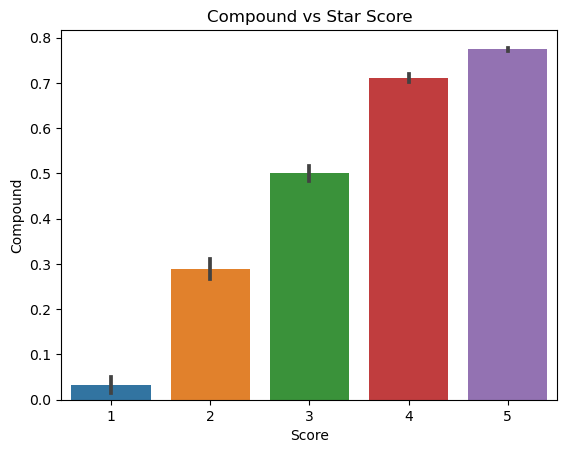

In [103]:
bar_plot = sns.barplot(data = merged_df, x = 'Score', y = 'Compound')
bar_plot.set_title('Compound vs Star Score')
plt.show()

We can dive a bit deeper and analyse how positivity, negativity and neutral look like over score.

Positivity 

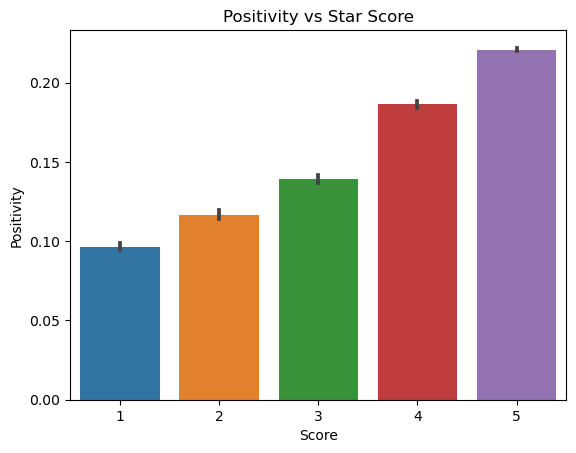

In [109]:
bar_plot_p = sns.barplot(data = merged_df, x = 'Score', y = 'Positivity')
bar_plot_p.set_title('Positivity vs Star Score')
plt.show()

Negativity

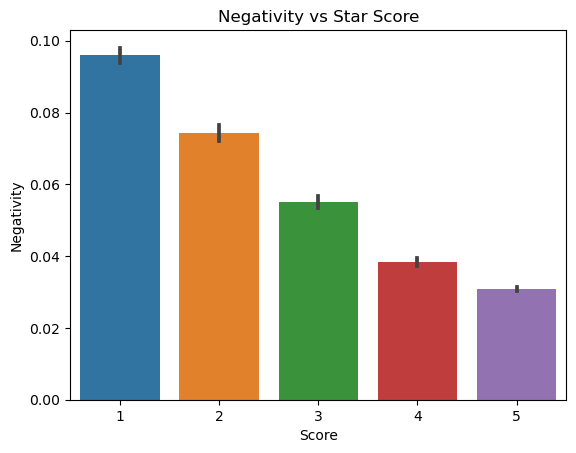

In [110]:
bar_plot_neg = sns.barplot(data = merged_df, x = 'Score', y = 'Negativity')
bar_plot_neg.set_title('Negativity vs Star Score')
plt.show()

Neutral

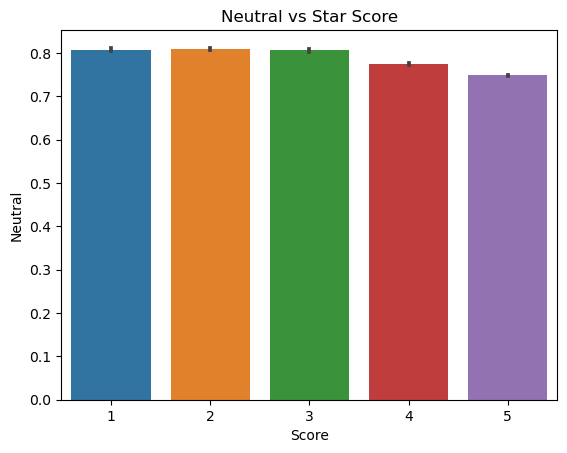

In [111]:
bar_plot_neg = sns.barplot(data = merged_df, x = 'Score', y = 'Neutral')
bar_plot_neg.set_title('Neutral vs Star Score')
plt.show()

Clearly, as the star review goes higher, positivity keeps going higher in the sentiment analysis of the text. The negativity goes lower. 
Inversely, as the star review goes higher, negativity keeps dropping in the sentiment analysis of the text. The positivity goes higher. 